In [2]:
# Cell 1: Load Fraud_Data.csv and inspect
import pandas as pd

# Load dataset
fraud_df = pd.read_csv('../data/raw/Fraud_Data.csv')

# Quick look at the data
print("Shape:", fraud_df.shape)
print("\nColumns:", fraud_df.columns.tolist())
print("\nFirst 5 rows:")
display(fraud_df.head())

# Check for missing values
print("\nMissing values per column:")
print(fraud_df.isnull().sum())

# Check data types
print("\nData types:")
print(fraud_df.dtypes)


Shape: (151112, 11)

Columns: ['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class']

First 5 rows:


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0



Missing values per column:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

Data types:
user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object


In [3]:
# Cell 2: Check for duplicates and convert data types safely

# Check for duplicate rows
duplicate_count = fraud_df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

# Convert signup_time and purchase_time to datetime
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])

# Convert ip_address to integer safely
# First, check for any NaN or non-integer floats
print("\nIP address stats:")
print(fraud_df['ip_address'].describe())

# Fill NaNs with 0 temporarily for conversion (won't affect mapping later)
fraud_df['ip_address'] = fraud_df['ip_address'].fillna(0).astype(int)

# Verify conversions
print("\nData types after conversion:")
print(fraud_df.dtypes)


Number of duplicate rows: 0

IP address stats:
count    1.511120e+05
mean     2.152145e+09
std      1.248497e+09
min      5.209350e+04
25%      1.085934e+09
50%      2.154770e+09
75%      3.243258e+09
max      4.294850e+09
Name: ip_address, dtype: float64

Data types after conversion:
user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address                 int64
class                      int64
dtype: object


Fraud class distribution:
class
0    136961
1     14151
Name: count, dtype: int64


C:\Users\Mer\AppData\Local\Temp\ipykernel_13176\997168472.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='viridis')


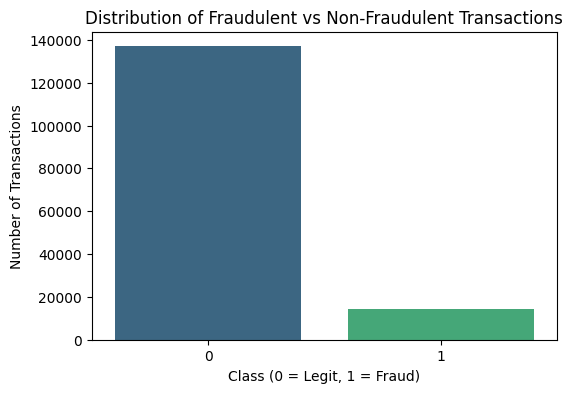


Summary statistics of numerical features:


,purchase_value,age,ip_address
count,151112.000000,151112.000000,1.511120e+05
mean,36.935372,33.140704,2.152145e+09
std,18.322762,8.617733,1.248497e+09
min,9.000000,18.000000,5.209300e+04
25%,22.000000,27.000000,1.085934e+09
50%,35.000000,33.000000,2.154770e+09
75%,49.000000,39.000000,3.243258e+09
max,154.000000,76.000000,4.294850e+09


In [4]:
# Cell 3: Explore target distribution and basic statistics

import matplotlib.pyplot as plt
import seaborn as sns

# Target distribution
fraud_counts = fraud_df['class'].value_counts()
print("Fraud class distribution:")
print(fraud_counts)

# Plot the distribution
plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='viridis')
plt.title("Distribution of Fraudulent vs Non-Fraudulent Transactions")
plt.xlabel("Class (0 = Legit, 1 = Fraud)")
plt.ylabel("Number of Transactions")
plt.show()

# Basic statistics of numerical features
print("\nSummary statistics of numerical features:")
display(fraud_df[['purchase_value', 'age', 'ip_address']].describe())


In [5]:
# Cell 4: Create time-based features for EDA purposes

# Extract hour of day and day of week from purchase_time
fraud_df['hour_of_day'] = fraud_df['purchase_time'].dt.hour
fraud_df['day_of_week'] = fraud_df['purchase_time'].dt.dayofweek  # 0 = Monday

# Compute time since signup in hours
fraud_df['time_since_signup_hours'] = (
    fraud_df['purchase_time'] - fraud_df['signup_time']
).dt.total_seconds() / 3600

# Inspect the new features
display(
    fraud_df[['signup_time', 'purchase_time',
              'hour_of_day', 'day_of_week',
              'time_since_signup_hours', 'class']].head()
)

# Sanity check for negative or zero values
print("Negative time_since_signup_hours:",
      (fraud_df['time_since_signup_hours'] < 0).sum())


,signup_time,purchase_time,hour_of_day,day_of_week,time_since_signup_hours,class
0,2015-02-24 22:55:49,2015-04-18 02:47:11,2,5,1251.856111,0
1,2015-06-07 20:39:50,2015-06-08 01:38:54,1,0,4.984444,0
2,2015-01-01 18:52:44,2015-01-01 18:52:45,18,3,0.000278,1
3,2015-04-28 21:13:25,2015-05-04 13:54:50,13,0,136.690278,0
4,2015-07-21 07:09:52,2015-09-09 18:40:53,18,2,1211.516944,0


Negative time_since_signup_hours: 0


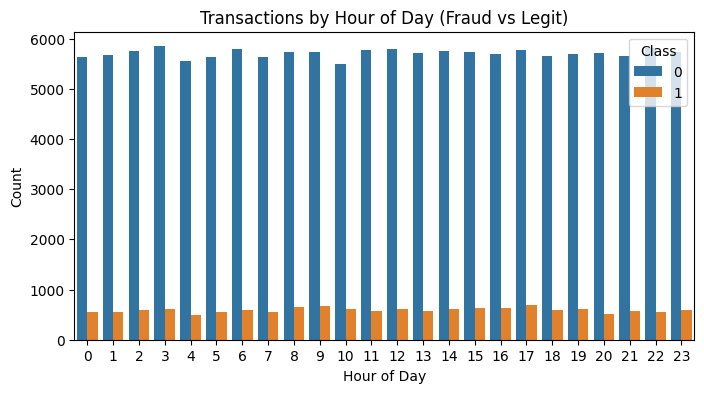

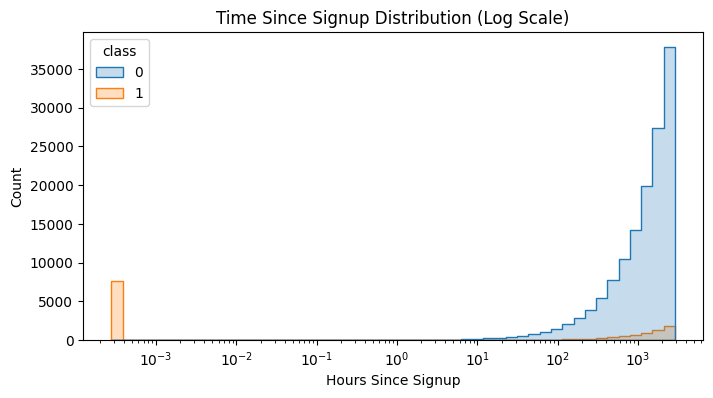

In [6]:
# Cell 5: Time-based EDA vs fraud label

import matplotlib.pyplot as plt
import seaborn as sns

# Hour of day vs fraud
plt.figure(figsize=(8,4))
sns.countplot(data=fraud_df, x='hour_of_day', hue='class')
plt.title('Transactions by Hour of Day (Fraud vs Legit)')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()

# Time since signup distribution (log scale helps)
plt.figure(figsize=(8,4))
sns.histplot(
    data=fraud_df,
    x='time_since_signup_hours',
    hue='class',
    bins=50,
    log_scale=True,
    element='step'
)
plt.title('Time Since Signup Distribution (Log Scale)')
plt.xlabel('Hours Since Signup')
plt.show()


In [3]:
# Cell 6: Load and inspect IP-to-Country mapping data

ip_df = pd.read_csv('../data/raw/IpAddress_to_Country.csv')

# Basic inspection
print("Shape:", ip_df.shape)
print("\nColumns:", ip_df.columns.tolist())
display(ip_df.head())

# Check data types and missing values
print("\nData types:")
print(ip_df.dtypes)

print("\nMissing values:")
print(ip_df.isnull().sum())


Shape: (138846, 3)

Columns: ['lower_bound_ip_address', 'upper_bound_ip_address', 'country']


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China



Data types:
lower_bound_ip_address    float64
upper_bound_ip_address      int64
country                    object
dtype: object

Missing values:
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64


In [4]:
# Cell 7: Prepare IP-to-Country table for range-based merge

# Convert lower_bound_ip_address to integer
ip_df['lower_bound_ip_address'] = ip_df['lower_bound_ip_address'].astype(int)

# Sort by lower bound (required for merge_asof)
ip_df = ip_df.sort_values('lower_bound_ip_address').reset_index(drop=True)

# Sanity check
print("Data types after conversion:")
print(ip_df.dtypes)

print("\nFirst 5 rows after sorting:")
display(ip_df.head())

print("\nLast 5 rows after sorting:")
display(ip_df.tail())


Data types after conversion:
lower_bound_ip_address     int64
upper_bound_ip_address     int64
country                   object
dtype: object

First 5 rows after sorting:


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216,16777471,Australia
1,16777472,16777727,China
2,16777728,16778239,China
3,16778240,16779263,Australia
4,16779264,16781311,China



Last 5 rows after sorting:


,lower_bound_ip_address,upper_bound_ip_address,country
138841,3758092288,3758093311,Hong Kong
138842,3758093312,3758094335,India
138843,3758095360,3758095871,China
138844,3758095872,3758096127,Singapore
138845,3758096128,3758096383,Australia


In [6]:
# Cell 8 : Enforce integer dtypes and perform range-based merge

# Enforce integer dtype explicitly on fraud_df IPs
fraud_df['ip_address'] = fraud_df['ip_address'].astype('int64')

# Sort again (required after type enforcement)
fraud_df = fraud_df.sort_values('ip_address').reset_index(drop=True)

# Sanity check dtypes before merge
print("Fraud IP dtype:", fraud_df['ip_address'].dtype)
print("IP lower bound dtype:", ip_df['lower_bound_ip_address'].dtype)

# Perform range-based merge
fraud_df = pd.merge_asof(
    fraud_df,
    ip_df,
    left_on='ip_address',
    right_on='lower_bound_ip_address',
    direction='backward'
)

# Check how many rows got a country
matched = fraud_df['country'].notna().sum()
total = fraud_df.shape[0]

print(f"Matched countries: {matched} / {total} ({matched/total:.2%})")

# Preview results
display(
    fraud_df[['ip_address', 'lower_bound_ip_address',
              'upper_bound_ip_address', 'country', 'class']].head(10)
)


Fraud IP dtype: int64
IP lower bound dtype: int64
Matched countries: 150478 / 151112 (99.58%)


,ip_address,lower_bound_ip_address,upper_bound_ip_address,country,class
0,52093,NaN,NaN,NaN,0
1,93447,NaN,NaN,NaN,0
2,105818,NaN,NaN,NaN,0
3,117566,NaN,NaN,NaN,0
4,131423,NaN,NaN,NaN,0
5,155130,NaN,NaN,NaN,0
6,155399,NaN,NaN,NaN,0
7,159119,NaN,NaN,NaN,0
8,166326,NaN,NaN,NaN,0
9,207999,NaN,NaN,NaN,0


In [7]:
# Cell 9: Handle missing country mappings

# Count missing countries before
missing_before = fraud_df['country'].isna().sum()
print("Missing countries before:", missing_before)

# Assign 'Unknown' to unmapped IPs
fraud_df['country'] = fraud_df['country'].fillna('Unknown')

# Verify
missing_after = fraud_df['country'].isna().sum()
print("Missing countries after:", missing_after)

# Check distribution
display(fraud_df['country'].value_counts().head(10))


Missing countries before: 634
Missing countries after: 0


country
United States        59222
Australia            21228
China                12038
Japan                 7918
United Kingdom        4492
Korea Republic of     4162
Germany               3647
France                3163
Canada                2981
Brazil                2961
Name: count, dtype: int64

In [8]:
# Cell 10: Fraud rate by country

country_fraud = (
    fraud_df
    .groupby('country')['class']
    .agg(['count', 'sum'])
    .rename(columns={'count': 'total_transactions', 'sum': 'fraud_cases'})
)

country_fraud['fraud_rate'] = (
    country_fraud['fraud_cases'] / country_fraud['total_transactions']
)

# Sort by fraud rate
country_fraud_sorted = country_fraud.sort_values(
    by='fraud_rate', ascending=False
)

# Show top suspicious countries (min 100 transactions for stability)
display(country_fraud_sorted[country_fraud_sorted['total_transactions'] >= 100].head(10))


,total_transactions,fraud_cases,fraud_rate
country,,,
Ecuador,106,28,0.264151
Tunisia,118,31,0.262712
Peru,119,31,0.260504
Ireland,240,55,0.229167
New Zealand,278,62,0.223022
Saudi Arabia,264,50,0.189394
Denmark,490,78,0.159184
Chile,417,64,0.153477
Greece,231,33,0.142857


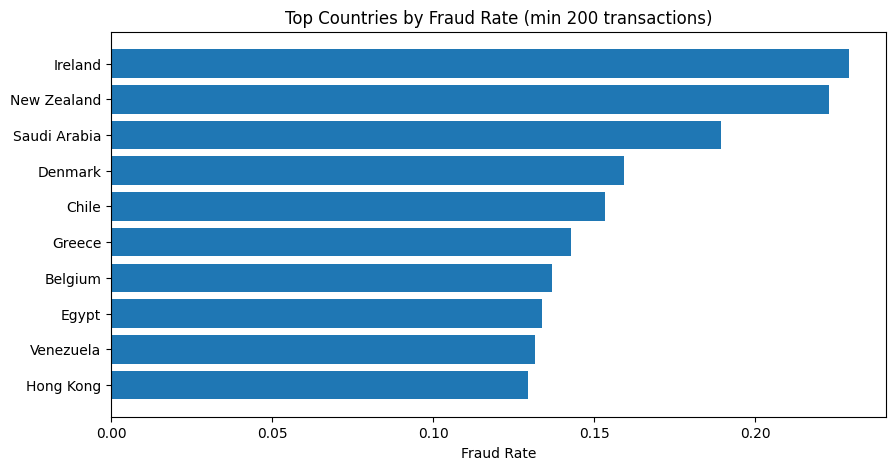

In [10]:
# Cell 11: Plot top countries by fraud rate

import matplotlib.pyplot as plt

top_countries = country_fraud_sorted[
    country_fraud_sorted['total_transactions'] >= 200
].head(10)

plt.figure(figsize=(10, 5))
plt.barh(top_countries.index, top_countries['fraud_rate'])
plt.xlabel('Fraud Rate')
plt.title('Top Countries by Fraud Rate (min 200 transactions)')
plt.gca().invert_yaxis()
plt.show()


In [11]:
# Cell 12: Transaction frequency per user in a rolling 7-day window

# Ensure purchase_time is datetime
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])

# Sort by user and purchase_time
fraud_df = fraud_df.sort_values(['user_id', 'purchase_time']).reset_index(drop=True)

# Compute number of transactions per user
user_txn_count = fraud_df.groupby('user_id')['purchase_time'].cumcount() + 1
fraud_df['user_total_txn'] = user_txn_count

# Compute rolling transactions per user in last 7 days (velocity)
# First, convert purchase_time to timestamp for numeric calculation
fraud_df['purchase_ts'] = fraud_df['purchase_time'].astype('int64') // 1_000_000_000  # seconds

# Rolling velocity: number of transactions in last 7 days (~604800 seconds)
window_seconds = 7 * 24 * 3600
fraud_df['txn_velocity_7d'] = fraud_df.groupby('user_id')['purchase_ts'].transform(
    lambda x: x.rolling(window=len(x), min_periods=1).apply(
        lambda s: (s > s.max() - window_seconds).sum()
    )
)

# Drop intermediate column
fraud_df.drop(columns=['purchase_ts'], inplace=True)

# Preview new features
fraud_df[['user_id', 'purchase_time', 'user_total_txn', 'txn_velocity_7d']].head(10)


,user_id,purchase_time,user_total_txn,txn_velocity_7d
0,2,2015-02-21 10:03:37,1,1.0
1,4,2015-09-26 21:32:16,1,1.0
2,8,2015-08-13 11:53:07,1,1.0
3,9,2015-05-20 23:06:42,1,1.0
4,12,2015-03-04 20:56:37,1,1.0
5,16,2015-03-12 12:46:23,1,1.0
6,18,2015-10-23 00:18:57,1,1.0
7,26,2015-03-21 09:04:08,1,1.0
8,33,2015-10-28 18:12:41,1,1.0
9,39,2015-01-08 18:13:26,1,1.0


class            0     1  fraud_rate
day_of_week                         
0            19622  2089    0.096219
1            19645  1669    0.078305
2            19605  1711    0.080268
3            19467  2119    0.098165
4            19330  2192    0.101849
5            19499  2149    0.099270
6            19793  2222    0.100931


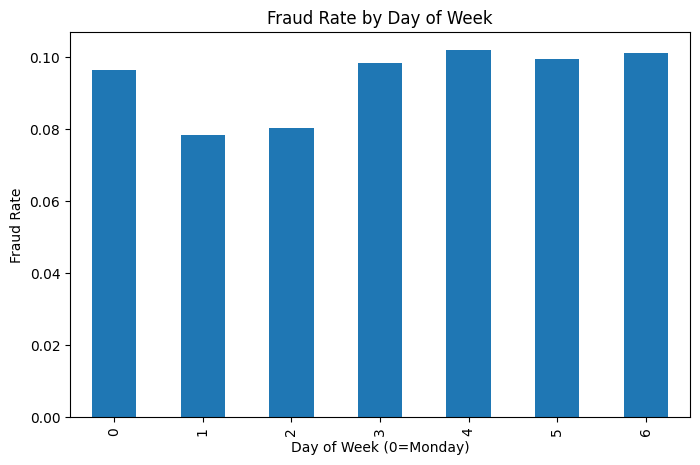

In [12]:
# Cell 13: Analyze transactions by day of the week

# Create day_of_week if not already present (0=Monday, 6=Sunday)
fraud_df['day_of_week'] = fraud_df['purchase_time'].dt.dayofweek

# Group by day_of_week and class
day_class_counts = fraud_df.groupby(['day_of_week', 'class']).size().unstack(fill_value=0)

# Calculate fraud rate per day
day_class_counts['fraud_rate'] = day_class_counts[1] / (day_class_counts[0] + day_class_counts[1])

# Preview table
print(day_class_counts)

# Optional: Plot
import matplotlib.pyplot as plt

day_class_counts[['fraud_rate']].plot(kind='bar', figsize=(8,5), legend=False)
plt.title('Fraud Rate by Day of Week')
plt.xlabel('Day of Week (0=Monday)')
plt.ylabel('Fraud Rate')
plt.show()


In [16]:
# Convert signup_time and purchase_time to datetime
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])

# Now create time_since_signup_hours
fraud_df['time_since_signup_hours'] = (fraud_df['purchase_time'] - fraud_df['signup_time']).dt.total_seconds() / 3600

# Quick check
fraud_df[['signup_time','purchase_time','time_since_signup_hours']].head()


,signup_time,purchase_time,time_since_signup_hours
0,2015-01-11 03:47:13,2015-02-21 10:03:37,990.273333
1,2015-06-02 16:40:57,2015-09-26 21:32:16,2788.855278
2,2015-05-28 07:53:06,2015-08-13 11:53:07,1852.000278
3,2015-05-16 15:58:32,2015-05-20 23:06:42,103.136111
4,2015-01-10 06:25:12,2015-03-04 20:56:37,1286.523611


In [14]:
print(fraud_df.columns)


Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'lower_bound_ip_address', 'upper_bound_ip_address', 'country',
       'user_total_txn', 'txn_velocity_7d', 'day_of_week'],
      dtype='object')


In [18]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# --- 1. Scale numerical features ---
num_features = ['purchase_value', 'age', 'time_since_signup_hours', 'user_total_txn', 'txn_velocity_7d']

scaler = StandardScaler()
fraud_df[num_features] = scaler.fit_transform(fraud_df[num_features])

# --- 2. Encode categorical features ---
cat_features = ['sex', 'browser', 'source', 'country']

encoder = OneHotEncoder(sparse_output=False, drop='first')  # <-- changed from 'sparse' to 'sparse_output'
encoded_cat = encoder.fit_transform(fraud_df[cat_features])

# Create DataFrame for encoded features
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(cat_features), index=fraud_df.index)

# Concatenate back to main DataFrame and drop original categorical columns
fraud_df = pd.concat([fraud_df.drop(columns=cat_features), encoded_cat_df], axis=1)

# Verify
print("Scaled numerical features:\n", fraud_df[num_features].head())
print("\nEncoded categorical features:\n", encoded_cat_df.head())


Scaled numerical features:
    purchase_value       age  time_since_signup_hours  user_total_txn  \
0        0.931338 -0.944649                -0.437279             0.0   
1        0.221836  0.563874                 1.633857             0.0   
2        0.549298 -0.944649                 0.555032             0.0   
3        1.367955 -1.408809                -1.458852             0.0   
4       -0.105627 -1.640890                -0.096136             0.0   

   txn_velocity_7d  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  

Encoded categorical features:
    sex_M  browser_FireFox  browser_IE  browser_Opera  browser_Safari  \
0    0.0              0.0         0.0            0.0             0.0   
1    0.0              0.0         0.0            0.0             1.0   
2    1.0              0.0         0.0            0.0             0.0   
3    1.0              1.0         0.0            0.0             0.0   
4    1.0             

In [30]:
print(fraud_df.columns)


Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'age', 'ip_address', 'class', 'lower_bound_ip_address',
       'upper_bound_ip_address',
       ...
       'country_Unknown', 'country_Uruguay', 'country_Uzbekistan',
       'country_Vanuatu', 'country_Venezuela', 'country_Viet Nam',
       'country_Virgin Islands (U.S.)', 'country_Yemen', 'country_Zambia',
       'country_Zimbabwe'],
      dtype='object', length=202)


In [32]:
# --- 1. Select numeric features for SMOTE ---
# Exclude target column 'class' and any datetime/object columns
X = fraud_df.drop(columns=['user_id', 'signup_time', 'purchase_time', 'device_id',
                           'lower_bound_ip_address', 'upper_bound_ip_address', 'class'])
y = fraud_df['class']

# Verify X and y shapes
print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nClass distribution before resampling:\n", y.value_counts())

# --- 2. Apply SMOTE to handle class imbalance ---
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("\nClass distribution after SMOTE:\n", pd.Series(y_res).value_counts())

# --- 3. Combine resampled features and target into a single DataFrame ---
fraud_df_resampled = pd.DataFrame(X_res, columns=X.columns)
fraud_df_resampled['class'] = y_res

# --- 4. Export cleaned and resampled data ---
fraud_df_resampled.to_csv("../data/processed/fraud_data_preprocessed.csv", index=False)
print("\nResampled and preprocessed data saved to data/processed/fraud_data_preprocessed.csv")


Features shape: (151112, 195)
Target shape: (151112,)

Class distribution before resampling:
 class
0    136961
1     14151
Name: count, dtype: int64

Class distribution after SMOTE:
 class
0    136961
1    136961
Name: count, dtype: int64


C:\Users\Mer\AppData\Local\Temp\ipykernel_13500\2926130510.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fraud_df_resampled['class'] = y_res



Resampled and preprocessed data saved to data/processed/fraud_data_preprocessed.csv


In [24]:
print(fraud_df.columns)


Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'age', 'ip_address', 'class', 'lower_bound_ip_address',
       'upper_bound_ip_address',
       ...
       'country_Unknown', 'country_Uruguay', 'country_Uzbekistan',
       'country_Vanuatu', 'country_Venezuela', 'country_Viet Nam',
       'country_Virgin Islands (U.S.)', 'country_Yemen', 'country_Zambia',
       'country_Zimbabwe'],
      dtype='object', length=202)
